In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df= pd.read_csv("weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
df.drop("Gender",axis=1,inplace=True)

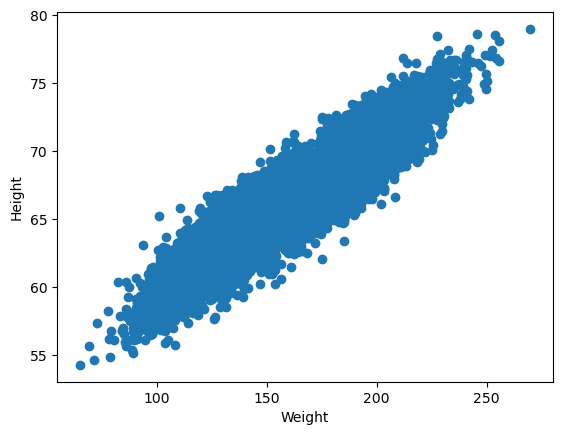

In [12]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [13]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [14]:
import seaborn as sns

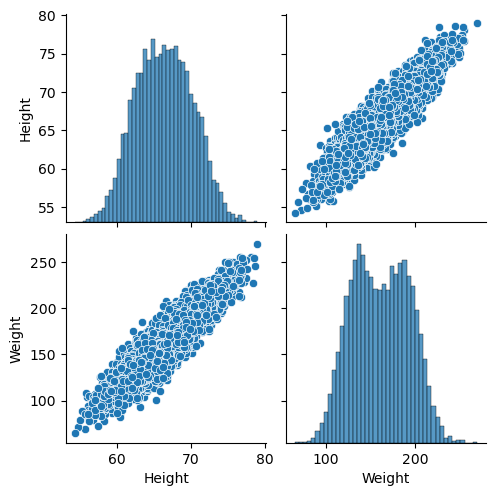

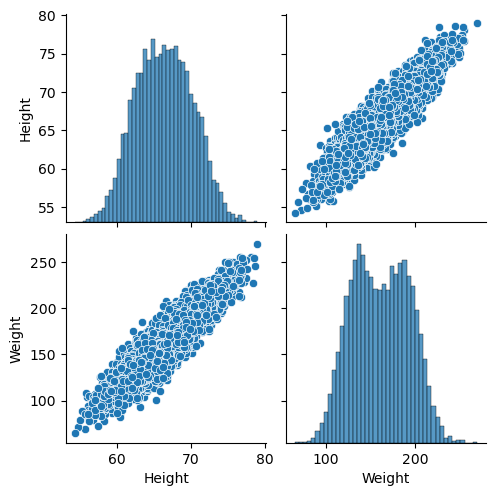

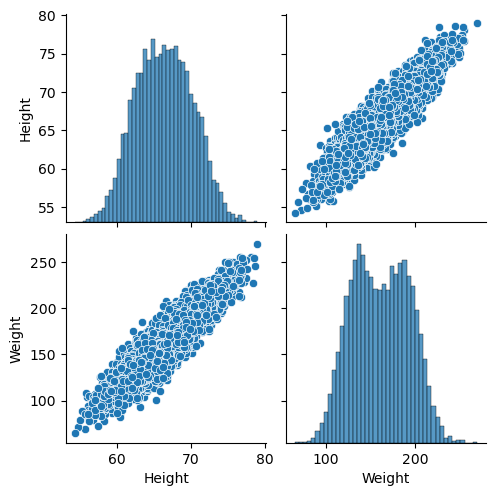

In [17]:
sns.pairplot(df)
plt.show()

In [22]:
X=df[['Weight']]   #make independent features as a dataframe or 2D array 
type(X)

pandas.core.frame.DataFrame

In [23]:
X.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [27]:
y=df['Height']   #can be in series
type(y)

pandas.core.series.Series

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
X_train.shape

(7500, 1)

In [31]:
X_test.shape

(2500, 1)

In [32]:
##Standardization

In [33]:
from sklearn.preprocessing import StandardScaler


In [34]:
scaler=StandardScaler()

In [37]:
X_train=scaler.fit_transform(X_train)

In [38]:
X_test=scaler.transform(X_test)

In [39]:
##Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression


In [41]:
regression=LinearRegression()

In [42]:
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
regression.coef_

array([3.55683995])

In [44]:
regression.intercept_

66.34521172463674

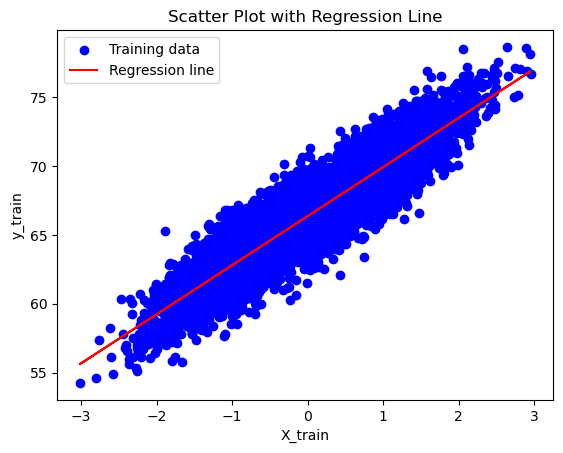

In [49]:
# Scatter plot with a specific color (e.g., blue)
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Line plot with a specific color (e.g., red)
plt.plot(X_train, regression.predict(X_train), color='red', label='Regression line')

# Optional: add labels, title, and legend
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Scatter Plot with Regression Line')
plt.legend()

# Show the plot
plt.show()

In [50]:
##prediction

In [51]:
y_pred=regression.predict(X_test)

In [52]:
##performance

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [62]:
mse

2.1372494755617257

In [63]:
mae

1.175517781463963

In [64]:
rmse

1.461933471660638

In [65]:
score=r2_score(y_test,y_pred)

In [66]:
score

0.855692126134387

In [68]:
#OLS

In [70]:
import statsmodels.api as sm

In [71]:
model=sm.OLS(y_train,X_train).fit()

In [72]:
prediction=model.predict(X_test)
prediction

array([-6.35268622,  0.21128818,  3.36941169, ...,  4.5932825 ,
        4.51029934,  0.48508363])

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.54
Date:                Fri, 18 Oct 2024   Prob (F-statistic):                    3.52e-06
Time:                        00:37:28   Log-Likelihood:                         -42105.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.5568      0.766      4.641      0.000       2.055       5.059
==============================================================================
Omnibus:                        4.541   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.506
Skew:                          -0.053   Prob(JB):                        0.105
Kurtosis:                       3.057   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
##prediction for new data

In [76]:
regression.predict([[72]])

array([322.43768796])